<a href="https://colab.research.google.com/github/ana-garcia/SAD_TPCs/blob/master/TPC_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sistemas de Suporte à Decisão

---------------

# TPC 3


Crie um ficheiro em python para trabalhar o dataset 

```python 
    datasets.california_housing
```

Nesse ficheiro, crie um script (função) por alínea que lhe permita gerar novos datasets a partir do dataset principal, onde tenha usado cada um dos seguintes métodos de pre-processamento: 

    1) Aggregation
    2) Sampling
    4) Dimensionality Reduction 
    5) Feature Subset Selection 
    6) Feature Creation 
    7) Discretization and Binarization 
    8) Attribute Transformation


O que é feito em cada caso, é da sua inteira liberdade. 




In [0]:
# Start by importing the modules

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset
data = datasets.california_housing.fetch_california_housing()


Aggregation

In [3]:
alldata = np.column_stack((data.data,data.target))
allnames = np.append(data.feature_names,"Classe")
dframe = pd.DataFrame(alldata, columns=allnames)
 

stat = dframe.groupby(dframe["Classe"].round()).agg(["mean"])
stat

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Classe
,mean,mean,mean,mean,mean,mean,mean,mean,mean
Classe,,,,,,,,,
0.0,1.764497,30.185714,5.029815,1.240071,1124.190476,3.484795,36.438238,-119.307429,0.433800
1.0,2.699116,27.662946,5.219423,1.130187,1381.181732,3.339910,36.201114,-119.605195,1.035113
2.0,3.780588,28.175842,5.232905,1.082492,1529.781978,3.072250,35.190148,-119.314191,1.941416
3.0,4.827580,28.694569,5.670862,1.053399,1469.216933,2.689606,35.493677,-119.887313,2.930416
4.0,5.478571,31.442294,5.970275,1.075931,1312.426523,2.907561,35.496595,-119.933140,3.899867
5.0,7.425310,33.533811,6.656651,1.090045,1145.303898,2.548488,35.230541,-119.696213,4.941340


Sampling

In [0]:
#random subset of data
random_subset = dframe.sample(n=10)
print(random_subset)

#sample rows with replacement
sample_with_replacement = dframe.sample(n=3,replace=True)
print(sample_with_replacement)

#randomly select a percentage of rows
fraction_of_rows = dframe.sample(frac=0.5)
print(fraction_of_rows.head()) 

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
16231  3.0625      47.0  5.470113   1.071082      1228.0  1.983845     37.98   
6342   1.9762      52.0  4.242754   1.152174      1126.0  4.079710     34.06   
11116  4.0724      25.0  5.007792   1.075325       961.0  2.496104     33.84   
17840  7.8532       8.0  6.961538   1.043956      1527.0  4.195055     37.44   
4073   7.6290      34.0  6.006590   1.004942      1390.0  2.289951     34.14   
12194  3.8056       7.0  6.599340   1.123660      7139.0  2.942704     33.63   
101    3.2177      28.0  3.878424   1.070808      2563.0  1.712091     37.81   
19056  4.8173      22.0  5.536232   0.944928      1001.0  2.901449     38.15   
2330   1.9483      16.0  4.216693   0.983949      1054.0  1.691814     36.82   
9115   5.9508      16.0  6.039906   1.002347      1273.0  2.988263     34.64   

       Longitude   Classe  
16231    -121.31  1.41500  
6342     -117.75  1.05800  
11116    -117.87  2.31400  
17840  

  Análise dos dados - Normalização e Grandezas Estatísticas
  -Medir a variância e a media, e normalizar os valores de cada feature

In [4]:
D = data.data
D.shape[0]

20640

In [5]:
N = D.shape[0]
avg = D.mean(axis=0)
avg

array([ 3.87067100e+00,  2.86394864e+01,  5.42899974e+00,  1.09667515e+00,
        1.42547674e+03,  3.07065516e+00,  3.56318614e+01, -1.19569704e+02])

In [8]:
sigma_ = np.sqrt((np.power((D-avg),2)).sum(axis=0)/N)
#ou 
sigma = D.std(axis=0)

print("average: \n--------\n",avg, "\n")
print("sigma: \n--------\n",sigma, "\n", sigma_)

('average: \n--------\n', array([ 3.87067100e+00,  2.86394864e+01,  5.42899974e+00,  1.09667515e+00,
        1.42547674e+03,  3.07065516e+00,  3.56318614e+01, -1.19569704e+02]), '\n')
('sigma: \n--------\n', array([1.89977569e+00, 1.25852527e+01, 2.47411320e+00, 4.73899376e-01,
       1.13243469e+03, 1.03857980e+01, 2.13590065e+00, 2.00348319e+00]), '\n', array([1.89977569e+00, 1.25852527e+01, 2.47411320e+00, 4.73899376e-01,
       1.13243469e+03, 1.03857980e+01, 2.13590065e+00, 2.00348319e+00]))


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


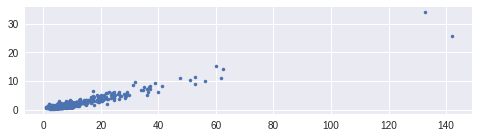

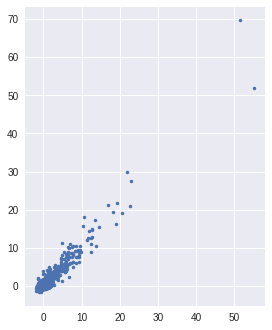

In [9]:
#Usando o dataFrame

#N = dframe.shape[0]
#med = dframe.agg("mean")
#print("Variances: \n----------\n\n",(np.power((dframe-med),2)).agg("sum")/N)

#normalizando:

D_norm = (D-avg)/sigma

#Feature 0 e 1
plt.plot(D[:,2], D[:,3], ".")
plt.axes().set_aspect('equal')
plt.show()

plt.figure
plt.plot(D_norm[:,2], D_norm[:,3], ".")
plt.axes().set_aspect('equal')
plt.show()

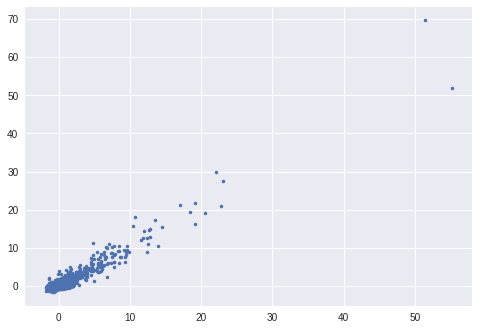

In [10]:
#usando sklearn
from sklearn import preprocessing

stdscaler = preprocessing.StandardScaler()
scaler = stdscaler.fit(D)
D_norm = scaler.transform(D)

plt.plot(D_norm[:,2], D_norm[:,3], ".")
plt.show()

Sklearn Binarization

In [13]:
from sklearn import preprocessing

binarizer = preprocessing.Binarizer().fit(D)
print(binarizer)
binarizer.threshold=3.5
print(D[0:5,:])
binarizer.transform(D)[:5,:]

Binarizer(copy=True, threshold=0.0)
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


array([[1., 1., 1., 0., 1., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0., 1., 0.]])

In [16]:
binarizer.transform(D[:,1].reshape(-1, 1))[:10,:]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])